In [1]:
# Dl framework - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.layers import BatchNormalization

In [3]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [4]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(250, 250, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
training_set=train_datagen.flow_from_directory('dataset/Train',target_size=(250,250),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/Validation',target_size=(250,250),batch_size=32,class_mode='categorical')

Found 299 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [7]:
img_dims = 150
epochs = 20
batch_size = 32

In [8]:
# Add ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)


In [9]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
# Fit the model with data augmentation and callbacks
history = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.samples // batch_size,
    callbacks=[reduce_lr])

Epoch 1/20
9/9 [==============================] - 29s 2s/step - loss: 6.3112 - accuracy: 0.5880 - val_loss: 1.1728 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 2/20
9/9 [==============================] - 21s 2s/step - loss: 9.2297 - accuracy: 0.5693 - val_loss: 2.1349 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/20
9/9 [==============================] - 20s 2s/step - loss: 7.8118 - accuracy: 0.5993 - val_loss: 2.0692 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 4/20
9/9 [==============================] - 20s 2s/step - loss: 7.5373 - accuracy: 0.6292 - val_loss: 0.9874 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 5/20
9/9 [==============================] - 21s 2s/step - loss: 6.2037 - accuracy: 0.6742 - val_loss: 12.4402 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 6/20
9/9 [==============================] - 21s 2s/step - loss: 5.1157 - accuracy: 0.6840 - val_loss: 4.6386 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 7/20
9/9 [==============================] - 20s 2s/step - loss: 7.2017 - accuracy: 0.67

In [11]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

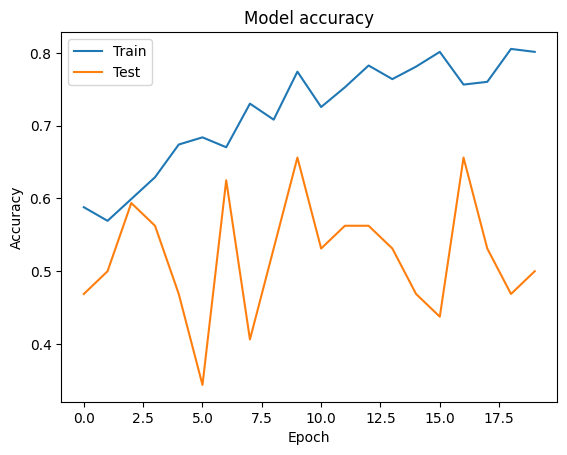

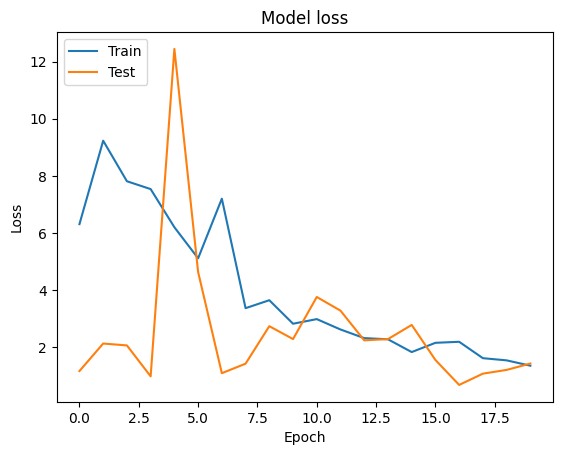

In [12]:
graph()

In [13]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
2/2 [==============================] - 5s 2s/step - loss: 1.5670 - accuracy: 0.4839
Test Accuracy: 48.38709533214569


               precision    recall  f1-score   support

    Defective       0.67      0.06      0.12        31
Non defective       0.51      0.97      0.67        31

     accuracy                           0.52        62
    macro avg       0.59      0.52      0.39        62
 weighted avg       0.59      0.52      0.39        62



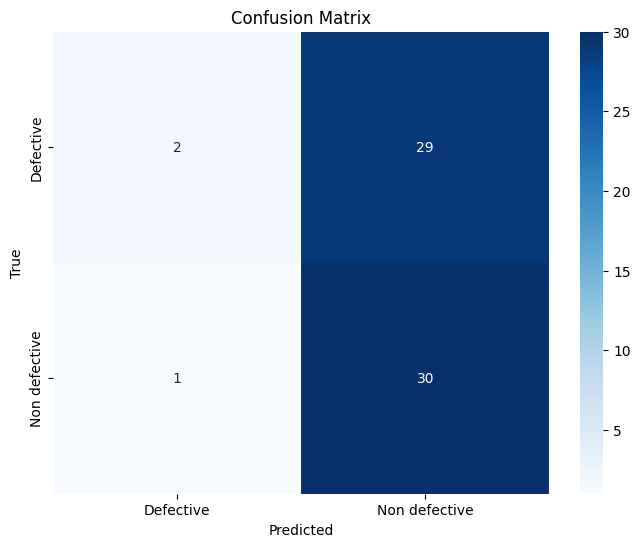

In [14]:
# Evaluate the model on the test set
test_set.reset()
y_true = test_set.classes
y_pred = np.argmax(model.predict_generator(test_set, steps=len(test_set)), axis=1)

# Print classification report
class_names = list(test_set.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, class_names)

In [5]:
import visualkeras


visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output_m2_rw.png') # write to disk
visualkeras.layered_view(model, to_file='output_m2_rw.png').show() # write and show

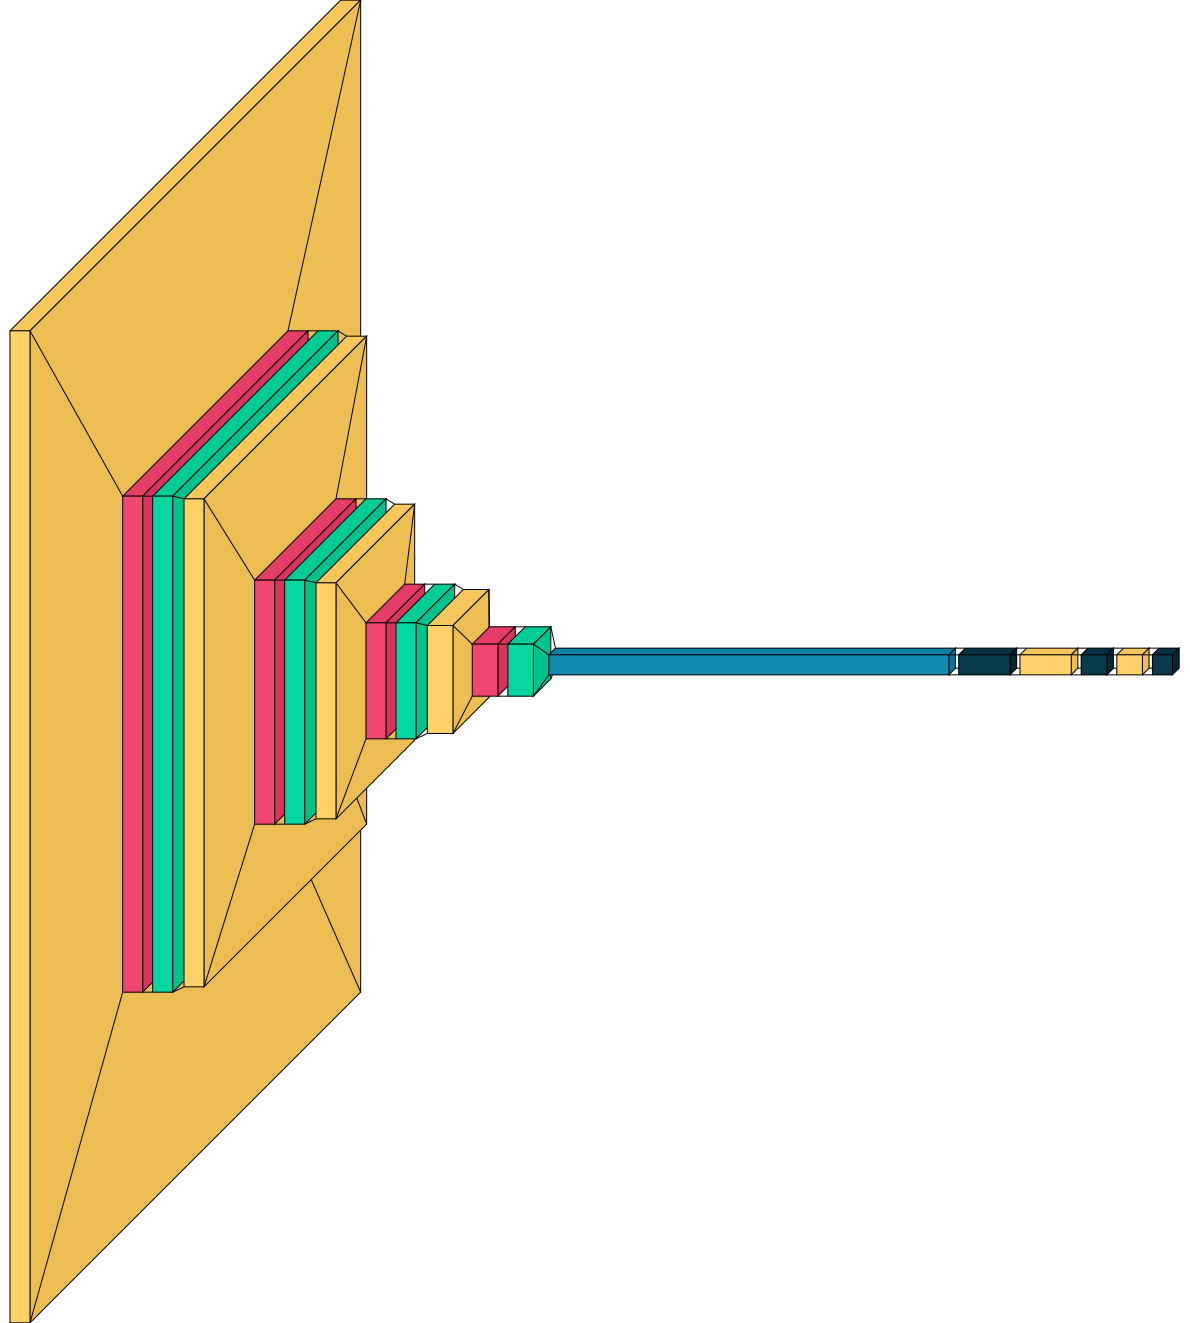

In [6]:
visualkeras.layered_view(model)